In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [2]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [3]:
pinkwink_web = pd.read_csv('./data/08. PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


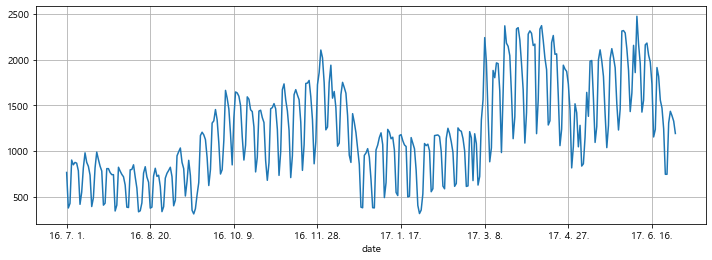

In [4]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [5]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [6]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [7]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


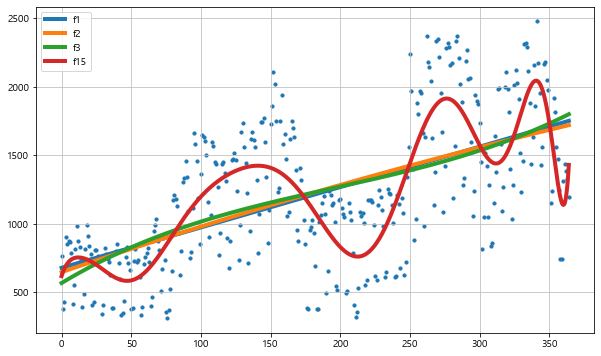

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

## 7-2. Prophet 모듈을 이용한 forecast 예측

In [9]:
# 에러남 AttributeError: 'Prophet' object has no attribute 'stan_backend'
# 해결

df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [10]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,680.493270,1104.519115
421,2017-08-26,481.544412,266.643707,692.485084
422,2017-08-27,614.212001,412.776098,835.703781
423,2017-08-28,1166.966207,965.079630,1377.375960
424,2017-08-29,1203.000155,977.838572,1421.215690


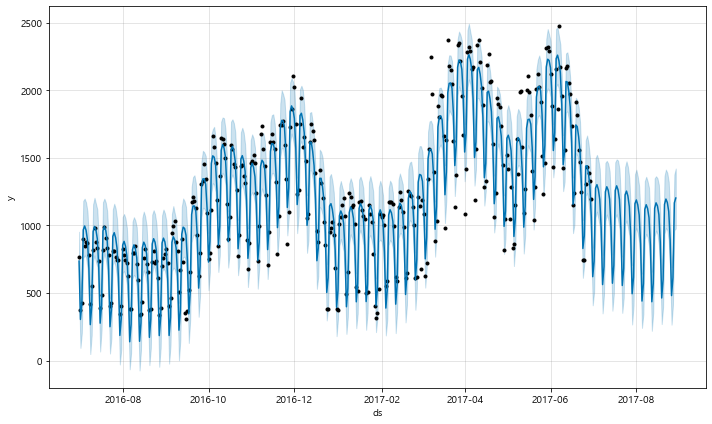

In [12]:
m.plot(forecast);

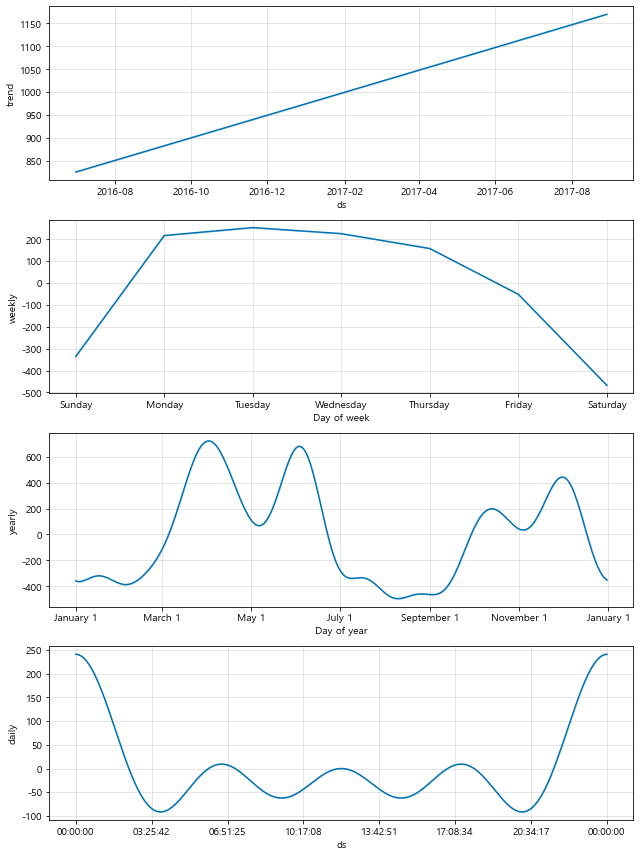

In [13]:
m.plot_components(forecast);

## 7-3. Seasonal 시계열 분석으로 주식 데이터 분석하기

In [15]:
from pandas_datareader import data
import yfinance as yf
yf.pdr_override()

start_date = '1990-1-1' 
end_date = '2017-6-30' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
    
# KIA = web.DataReader('KRX:000270','google',start,end) # 구글용... 동작이 안됨
# KIA = web.DataReader('000270.KS','yahoo',start,end) # 구글용... 동작이 안됨
KIA.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.519043,7665.241699,7300.229980,7665.241699,5367.460449,636300
2000-01-05,7404.519043,7404.519043,7248.085449,7248.085449,5075.353516,686100
2000-01-06,7331.516602,7519.236816,6935.218262,6935.218262,4856.273438,379000
2000-01-07,6987.362793,7143.796387,6778.785156,6778.785156,4746.733398,701400
2000-01-10,6841.358398,7102.081055,6810.071777,7091.651855,4965.812500,1076700


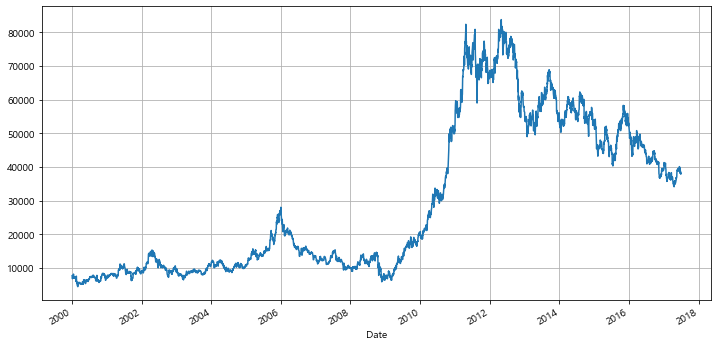

In [16]:
KIA['Close'].plot(figsize=(12,6), grid=True);

In [17]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.519043,7665.241699,7300.229980,7665.241699,5367.460449,636300
2000-01-05,7404.519043,7404.519043,7248.085449,7248.085449,5075.353516,686100
2000-01-06,7331.516602,7519.236816,6935.218262,6935.218262,4856.273438,379000
2000-01-07,6987.362793,7143.796387,6778.785156,6778.785156,4746.733398,701400
2000-01-10,6841.358398,7102.081055,6810.071777,7091.651855,4965.812500,1076700
...,...,...,...,...,...,...
2016-12-23,38700.000000,39350.000000,38650.000000,39100.000000,33386.179688,1070783
2016-12-26,39100.000000,39350.000000,38850.000000,39000.000000,33300.796875,465612
2016-12-27,39050.000000,39700.000000,39050.000000,39500.000000,33727.730469,879686


In [19]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2000-01-04,7665.241699
1,2000-01-05,7248.085449
2,2000-01-06,6935.218262
3,2000-01-07,6778.785156
4,2000-01-10,7091.651855


In [20]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [22]:
# 61일간 데이터 예측
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
4357,2017-02-24
4358,2017-02-25
4359,2017-02-26
4360,2017-02-27
4361,2017-02-28


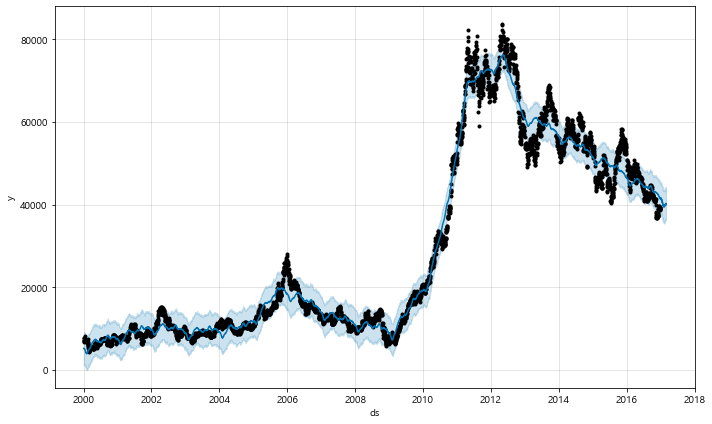

In [23]:
# 결과를 그래프로 확인
forecast = m.predict(future)
m.plot(forecast);

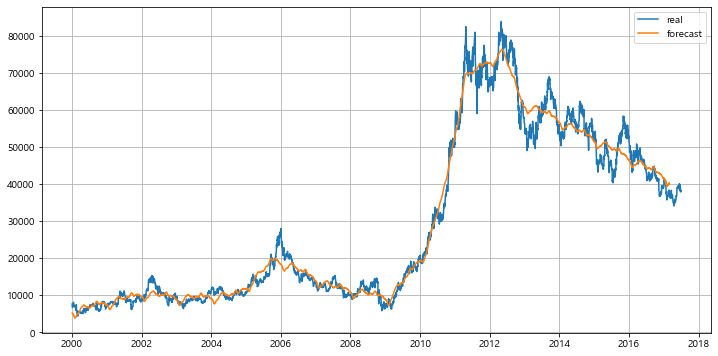

In [25]:
# 참값과 예측값이 유사한지 비교하기
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

## 7-4 Growth Model과 Holiday Forecase

In [ ]:
df = pd.read_csv('./data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [ ]:
df['cap'] = 8.5

In [ ]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

In [ ]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

In [ ]:
forecast = m.predict(future)
m.plot_components(forecast);

### holiday

In [ ]:
df = pd.read_csv('./data/08. example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=366)

In [ ]:
df.y.plot(figsize=(12,6), grid=True);

In [ ]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [ ]:
m = Prophet(holidays=holidays, daily_seasonality=True)
forecast = m.fit(df).predict(future)

In [ ]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

In [ ]:
m.plot(forecast);

In [ ]:
m.plot_components(forecast);